# Importing Necessary Libraries

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

# Reading Data Set

In [208]:
df = pd.read_excel("D:/Great Lakes BA Cert/Capstone/Sales.xlsx")

# Basic Data Exploration

In [209]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [211]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [212]:
df.shape

(4520, 20)

# Null value Analysis

In [213]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

# Check For Duplicate

In [214]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 0


,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore


# Label Encoding for Ctaegorical Variables

In [215]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Channel']= label_encoder.fit_transform(df['Channel'])
df['Occupation']= label_encoder.fit_transform(df['Occupation'])
df['EducationField']= label_encoder.fit_transform(df['EducationField'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Designation']= label_encoder.fit_transform(df['Designation'])
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
df['Zone']= label_encoder.fit_transform(df['Zone'])
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   int32  
 5   Occupation            4520 non-null   int32  
 6   EducationField        4520 non-null   int32  
 7   Gender                4520 non-null   int32  
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   int32  
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   int32  
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

# Imputing Values for Nans

In [217]:
model1=df['Age'].mode()[0]
model2=df['CustTenure'].mode()[0]
model3=df['MonthlyIncome'].mean()
model4=df['ExistingPolicyTenure'].mode()[0]
model5=df['SumAssured'].mean()
model6=df['CustCareScore'].mode()[0]
model7=df['NumberOfPolicy'].mode()[0]
df['Age'].replace(np.nan,model1,inplace=True)
df['CustTenure'].replace(np.nan,model2,inplace=True)
df['MonthlyIncome'].replace(np.nan,model3,inplace=True)
df['ExistingPolicyTenure'].replace(np.nan,model4,inplace=True)
df['SumAssured'].replace(np.nan,model5,inplace=True)
df['CustCareScore'].replace(np.nan,model6,inplace=True)
df['NumberOfPolicy'].replace(np.nan,model7,inplace=True)

In [218]:
df.duplicated().sum()

0

In [219]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [220]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,0,3,2,1,3,3,2.0,2,20993.0,1,2.0,806761.000000,1,0,5,2.0
1,7000001,2214,11.0,2.0,2,3,2,2,4,3,4.0,0,20130.0,0,3.0,294502.000000,1,3,7,3.0
2,7000002,4273,26.0,4.0,0,0,4,2,4,1,3.0,3,17090.0,1,2.0,619999.699267,1,3,0,3.0
3,7000003,1791,11.0,4.0,2,3,2,0,3,2,3.0,0,17909.0,1,2.0,268635.000000,3,0,0,5.0
4,7000004,2955,6.0,4.0,0,4,5,2,3,2,4.0,0,18468.0,0,4.0,366405.000000,3,0,2,5.0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4520 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   Channel               4520 non-null   int32  
 5   Occupation            4520 non-null   int32  
 6   EducationField        4520 non-null   int32  
 7   Gender                4520 non-null   int32  
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   int32  
 10  NumberOfPolicy        4520 non-null   float64
 11  MaritalStatus         4520 non-null   int32  
 12  MonthlyIncome         4520 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4520 non-null   float64
 15  SumAssured           

# Univaraite Analysis with Box Plot & Density Graph

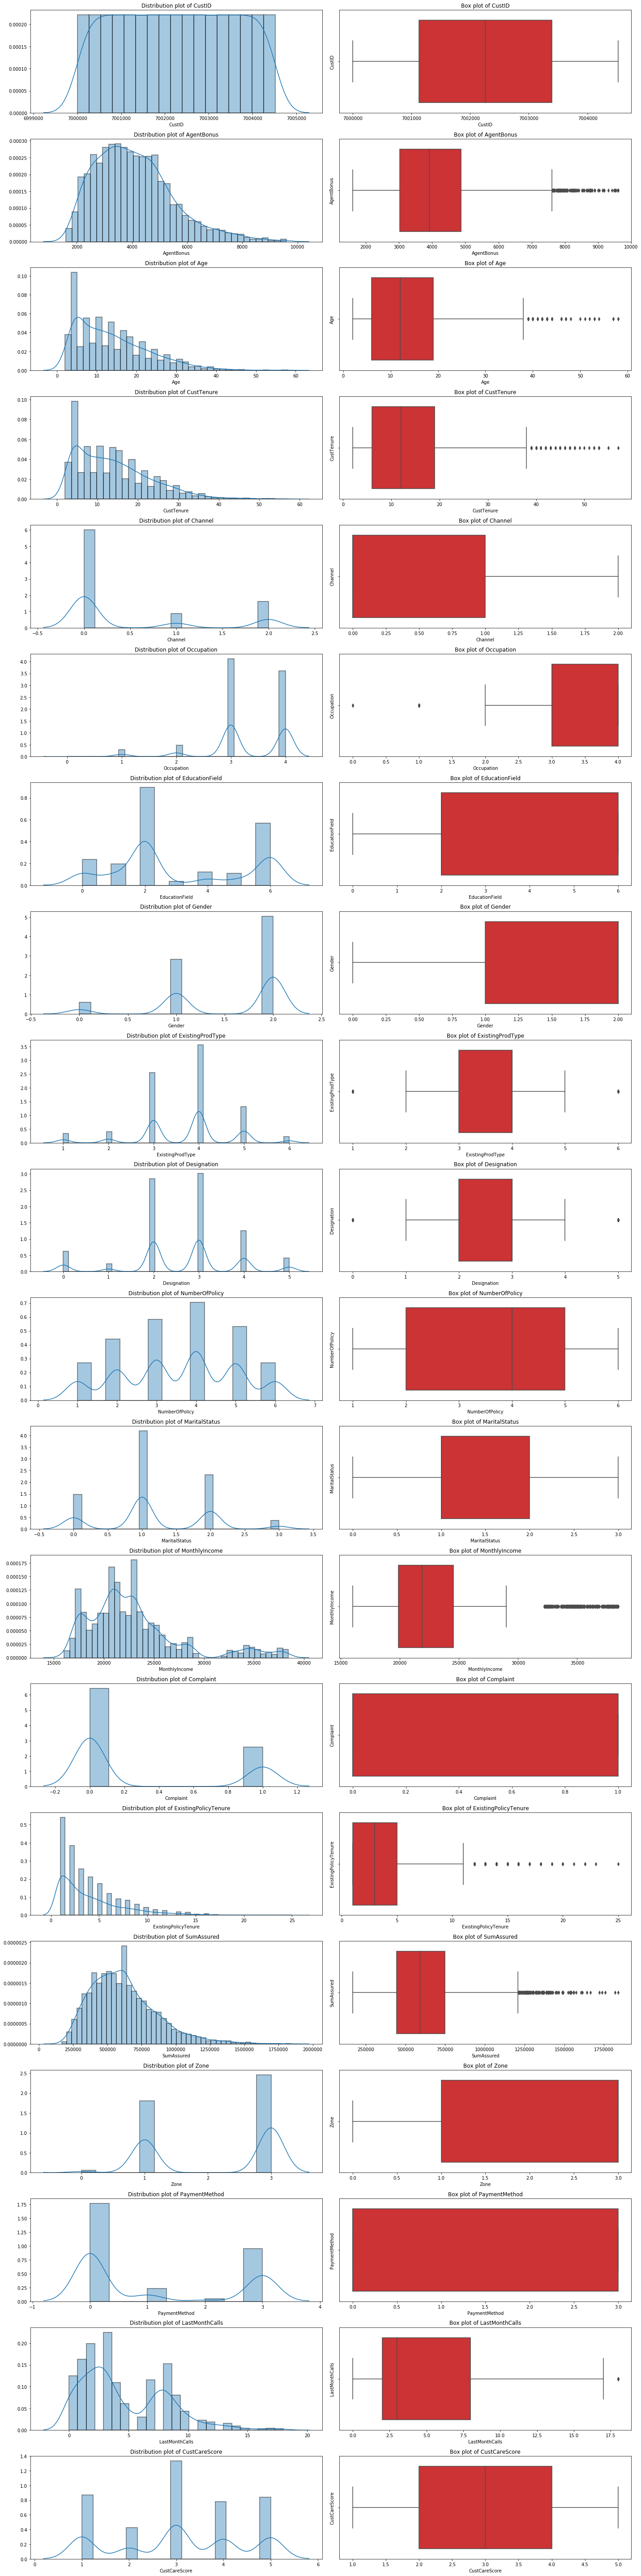

In [222]:
a = len(df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,80))

for i in df.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = df[i], orient='h', palette='Set1')
    c = c + 1

plt.tight_layout()
plt.show()

# Outlier Treatment

In [223]:
#outlier treatment

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [224]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

# Univaraite Analysis After Outlier Treament

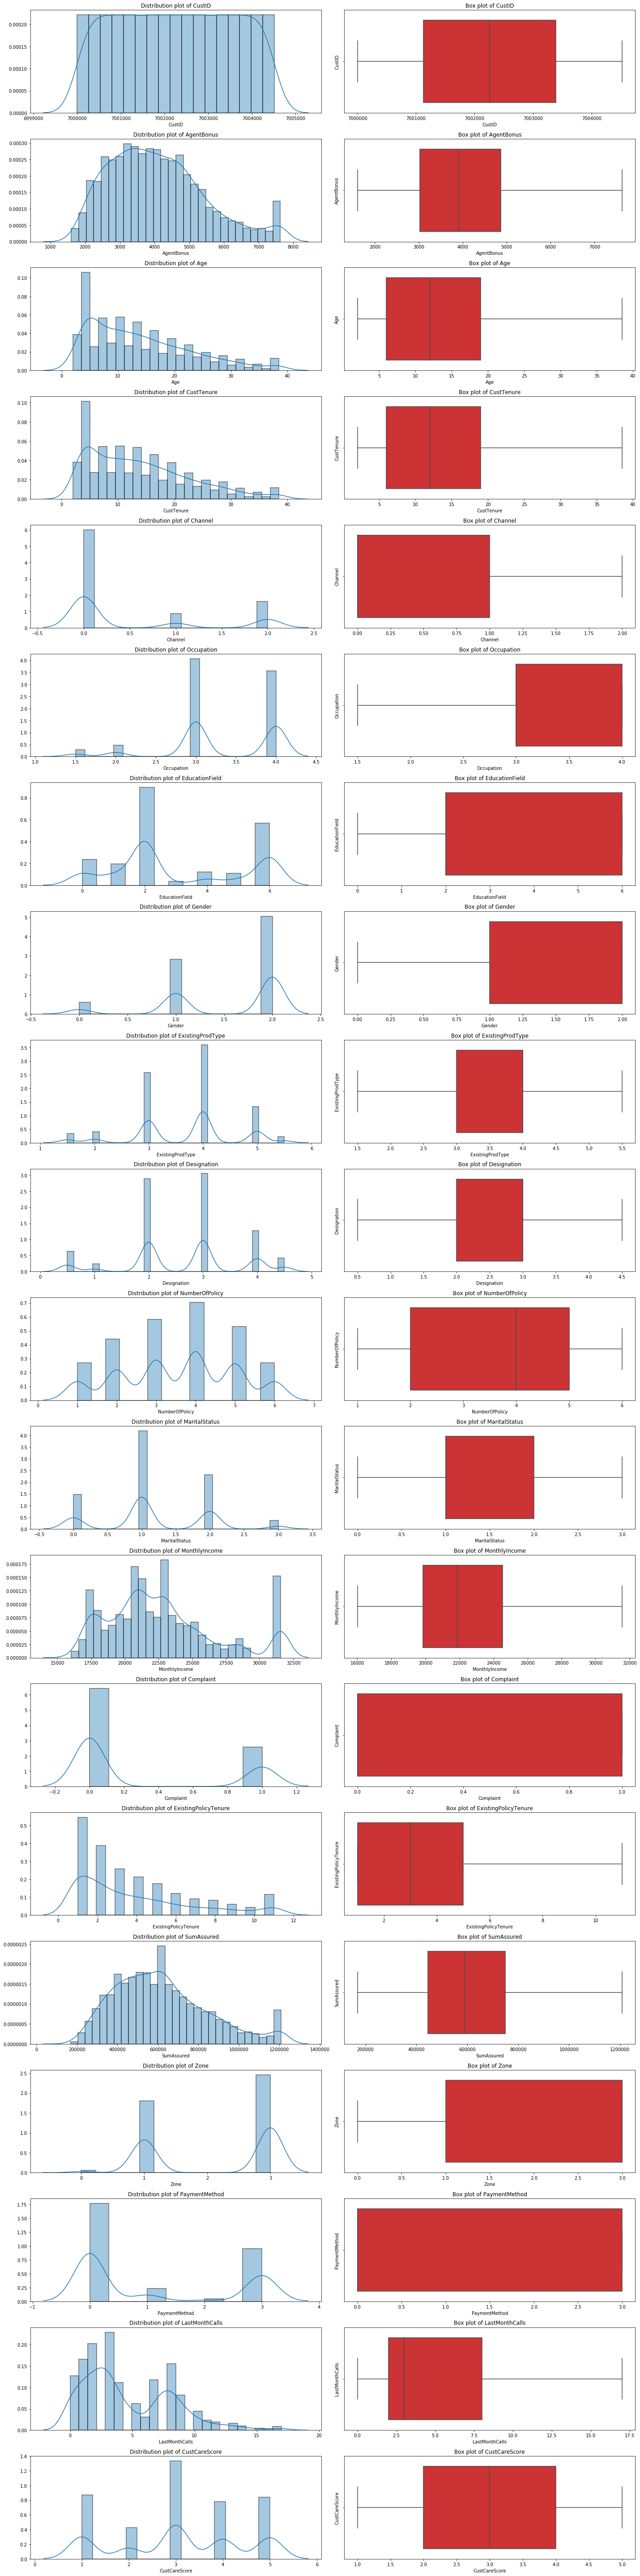

In [225]:
a = len(df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,80))

for i in df.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = df[i], orient='h', palette='Set1')
    c = c + 1

plt.tight_layout()
plt.show()

# Bivaraite analysis

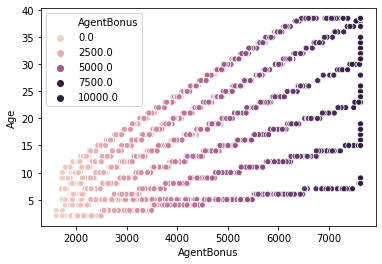

In [226]:
sns.scatterplot(x='AgentBonus',y='Age',data=df,hue='AgentBonus')

# Checking for Correlation using Heatmap

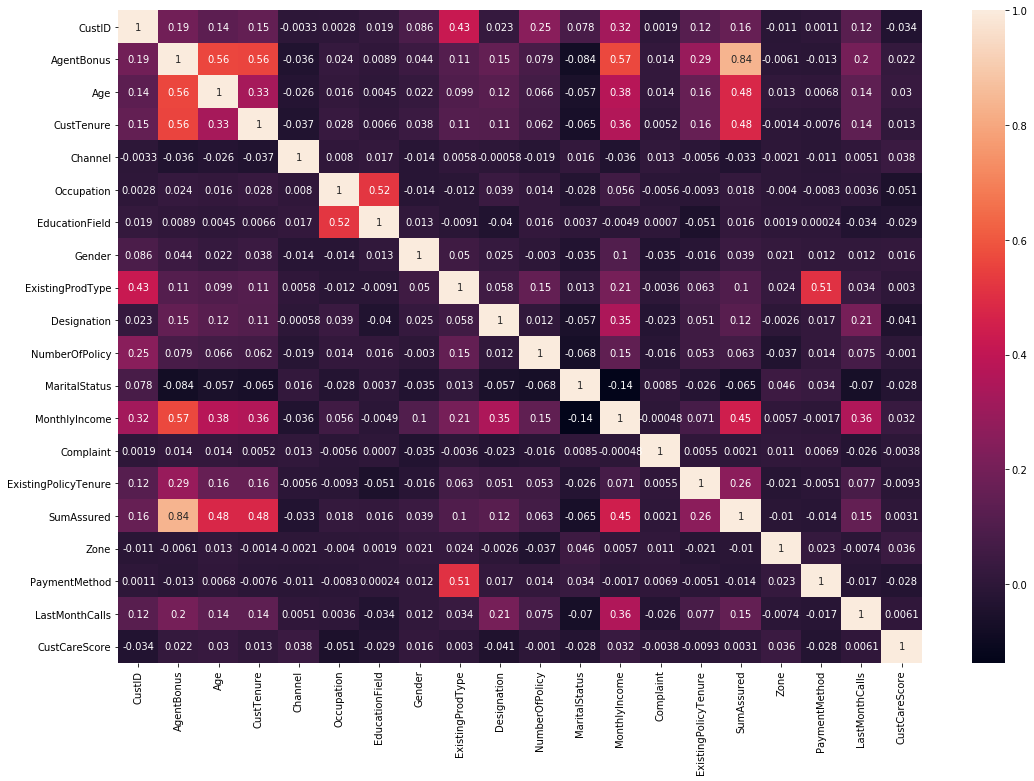

In [228]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot=True);

# Bivaraite Analysis With target Varaible

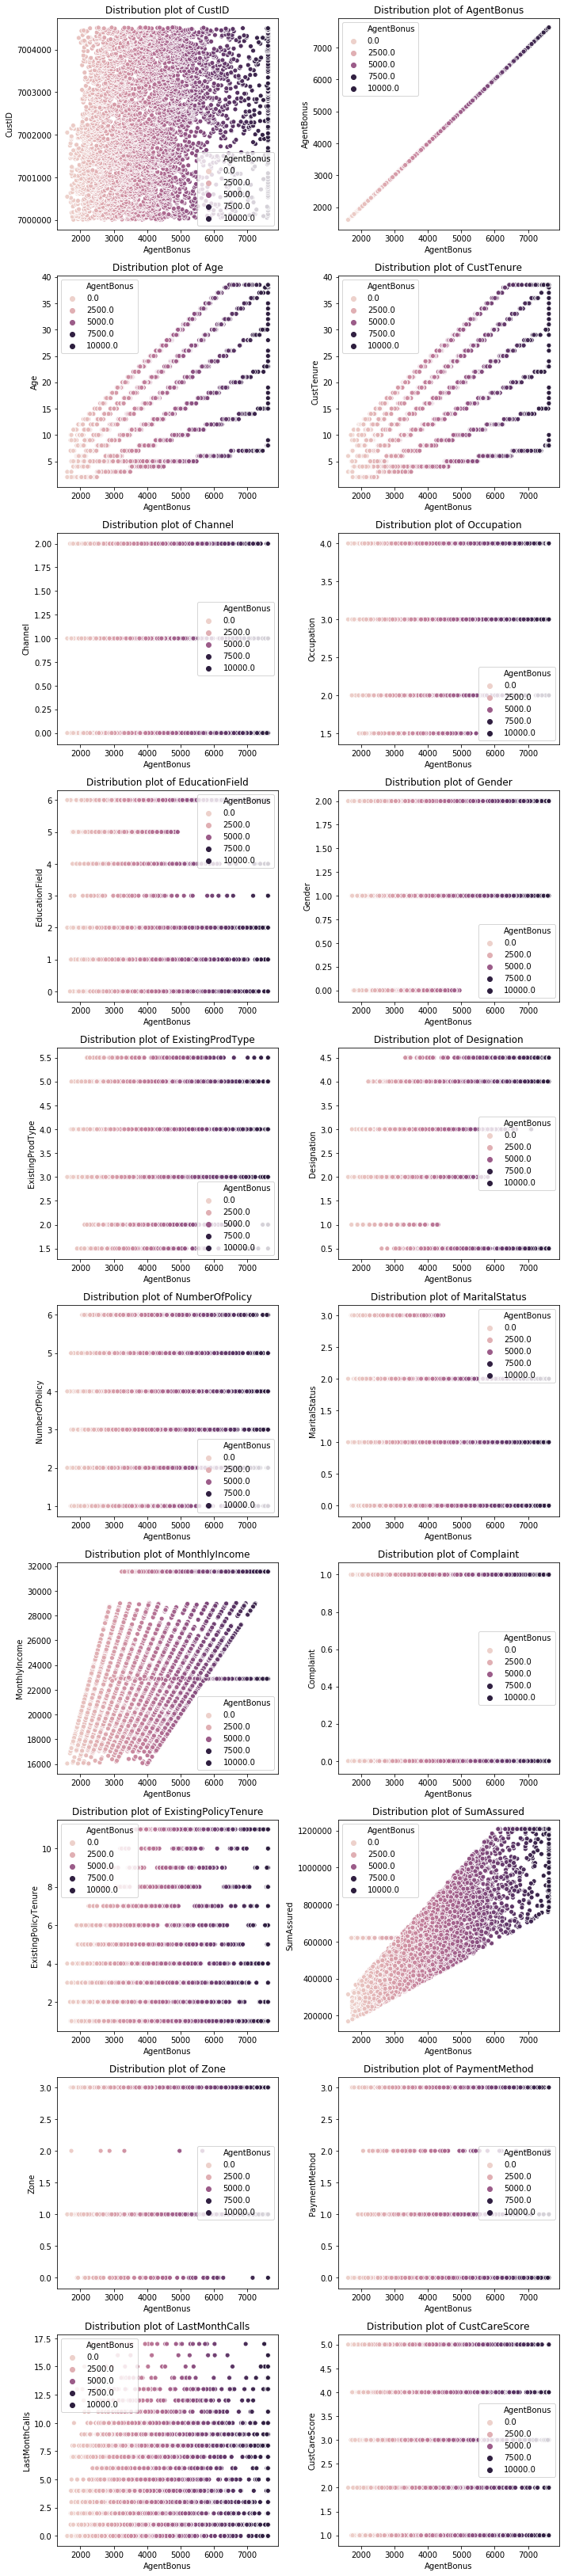

In [229]:
a = len(df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(10,90))

for i in df.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.scatterplot('AgentBonus',df[i],data=df,hue='AgentBonus')
    c = c + 1
plt.tight_layout()
plt.show()

# Examining different varaibles in dataset

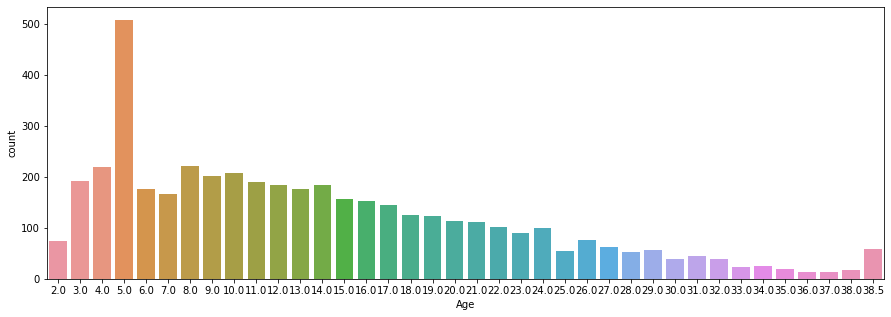

In [230]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])

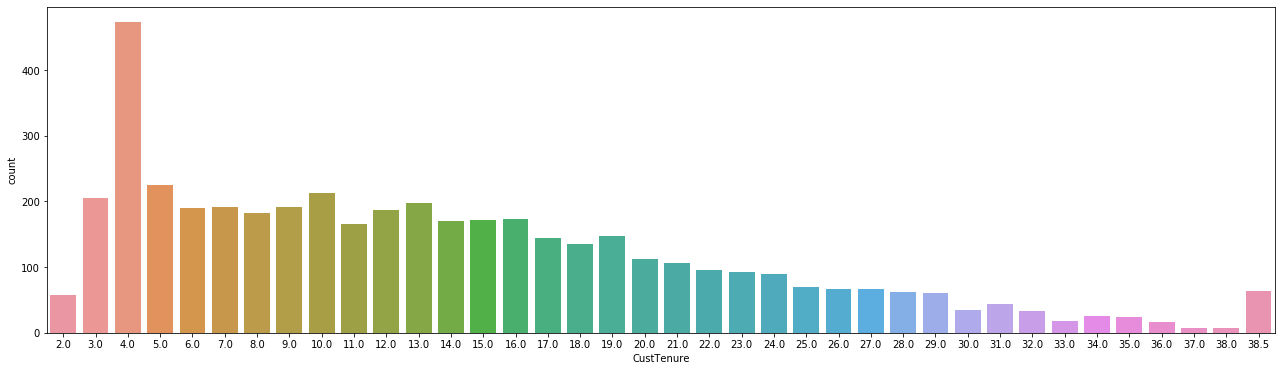

In [231]:
plt.figure(figsize=(22,6))
sns.countplot(df['CustTenure'])

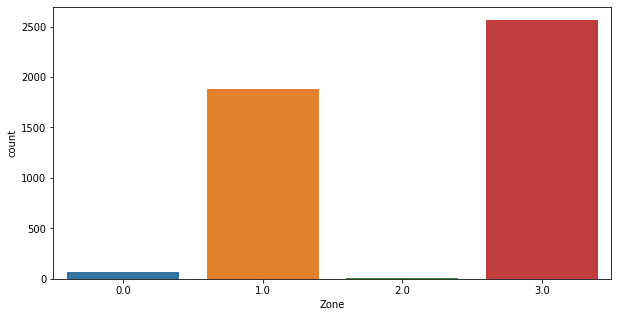

In [232]:
plt.figure(figsize=(10,5))
sns.countplot(df['Zone'])

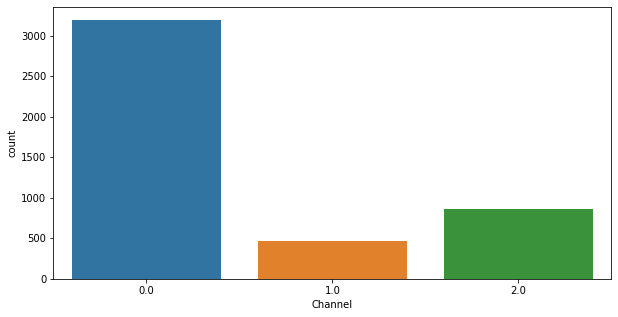

In [233]:
plt.figure(figsize=(10,5))
sns.countplot(df['Channel'])

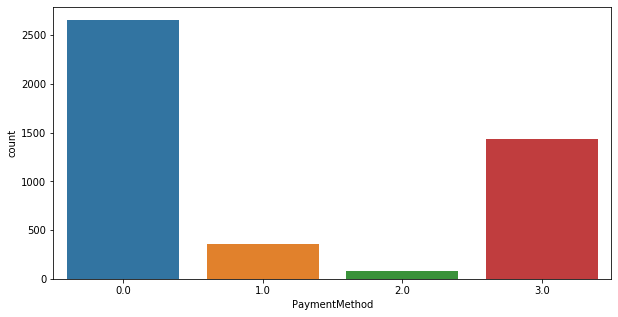

In [234]:
plt.figure(figsize=(10,5))
sns.countplot(df['PaymentMethod'])
labels = ["Half Yearly 0","Monthly 1"]

# Clustering using Kmeans

In [235]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [236]:
X=StandardScaler()

In [237]:
scaled_df=X.fit_transform(df)

In [238]:
scaled_df

array([[-1.73166765,  0.25492775,  0.92550313, ..., -0.77799336,
         0.104054  , -0.7759467 ],
       [-1.73090126, -1.36126003, -0.32454144, ...,  1.41618093,
         0.65802815, -0.04859724],
       [-1.73013486,  0.15479037,  1.38006478, ...,  1.41618093,
        -1.28088139, -0.04859724],
       ...,
       [ 1.73013486, -0.19937196,  1.03914354, ..., -0.77799336,
        -0.17293308, -1.50329615],
       [ 1.73090126,  0.55460357, -0.43818185, ..., -0.77799336,
        -1.00389432,  1.40610167],
       [ 1.73166765,  0.51631575,  0.01637981, ..., -0.77799336,
        -1.00389432, -0.04859724]])

In [239]:
k_means=KMeans(n_clusters=2)

In [240]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [241]:
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [242]:
k_means.inertia_

80018.19687057473

In [243]:
k_means=KMeans(n_clusters=2)
k_means.fit(scaled_df)
k_means.inertia_

80018.010013809

In [244]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_df)
k_means.inertia_

75801.92862137061

In [245]:
k_means=KMeans(n_clusters=4)
k_means.fit(scaled_df)
k_means.inertia_

72860.67261724126

In [246]:
wss=[]

In [247]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [248]:
wss

[90400.0,
 80018.05747166346,
 75801.70697118147,
 72860.73761894759,
 70720.1948895827,
 69002.31608115745,
 67403.18021565808,
 65972.31807853784,
 64620.510472321395,
 63715.32472345266]

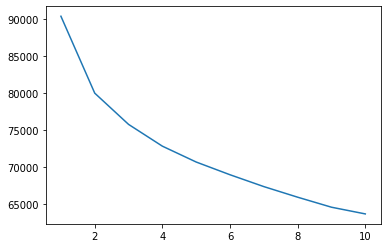

In [249]:
plt.plot(range(1,11),wss)

In [250]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_df)
labels=k_means.labels_

In [251]:
df["Clus_kmeans"] =labels
df.head(5)

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Clus_kmeans
0,7000000.0,4409.0,22.0,4.0,0.0,3.0,2.0,1.0,3.0,3.0,...,2.0,20993.0,1.0,2.0,806761.000000,1.0,0.0,5.0,2.0,1
1,7000001.0,2214.0,11.0,2.0,2.0,3.0,2.0,2.0,4.0,3.0,...,0.0,20130.0,0.0,3.0,294502.000000,1.0,3.0,7.0,3.0,0
2,7000002.0,4273.0,26.0,4.0,0.0,1.5,4.0,2.0,4.0,1.0,...,3.0,17090.0,1.0,2.0,619999.699267,1.0,3.0,0.0,3.0,0
3,7000003.0,1791.0,11.0,4.0,2.0,3.0,2.0,0.0,3.0,2.0,...,0.0,17909.0,1.0,2.0,268635.000000,3.0,0.0,0.0,5.0,1
4,7000004.0,2955.0,6.0,4.0,0.0,4.0,5.0,2.0,3.0,2.0,...,0.0,18468.0,0.0,4.0,366405.000000,3.0,0.0,2.0,5.0,1


In [252]:
df.to_csv('df.csv')